## Imports

In [1]:
import pandas as pd
import numpy as np
import regex as re
import scipy as sp
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

Reading in the datasets

In [2]:
mens = pd.read_csv("./datasets/mens_reddit2.csv")

In [3]:
womens = pd.read_csv("./datasets/womens_reddit2.csv")

In [4]:
mens.head()

,Unnamed: 0,subreddit,selftext,title
0,0,malefashionadvice,NaN,Fast Drying Mens 100% Cotton Gym Towels
1,1,malefashionadvice,[removed],Looking For Boots
2,2,malefashionadvice,NaN,Drew today's outfit
3,3,malefashionadvice,[removed],Advice for collars for the well dressed Man on...
4,4,malefashionadvice,Figured maybe I could get some help from other...,"need help finding these mens 3"" or 4"" soffe sh..."


In [5]:
mens.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
womens.head()

,Unnamed: 0,subreddit,selftext,title
0,0,femalefashionadvice,I hate how mittens or woolen gloves look. It's...,What are some good looking but also comfy warm...
1,1,femalefashionadvice,Whether you’re trying to decipher your cousin’...,"Weddings, Parties, and Events - January 27, 2020"
2,2,femalefashionadvice,[removed],High Quality Fashion Brands for Curvy (not mea...
3,3,femalefashionadvice,I’m 20 NB AMAB Person here and in a little les...,I need help designing an outfit for a theme party
4,4,femalefashionadvice,[removed],I don't know what style I am...


In [7]:
womens.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
womens.head(2)

,subreddit,selftext,title
0,femalefashionadvice,I hate how mittens or woolen gloves look. It's...,What are some good looking but also comfy warm...
1,femalefashionadvice,Whether you’re trying to decipher your cousin’...,"Weddings, Parties, and Events - January 27, 2020"


In [9]:
fashion = pd.concat([mens, womens], ignore_index=True, sort =False)

In [10]:
fashion.head()

,subreddit,selftext,title
0,malefashionadvice,NaN,Fast Drying Mens 100% Cotton Gym Towels
1,malefashionadvice,[removed],Looking For Boots
2,malefashionadvice,NaN,Drew today's outfit
3,malefashionadvice,[removed],Advice for collars for the well dressed Man on...
4,malefashionadvice,Figured maybe I could get some help from other...,"need help finding these mens 3"" or 4"" soffe sh..."


In [11]:
fashion.tail()

,subreddit,selftext,title
10995,femalefashionadvice,Have a couple photos you love but enough to ma...,"Share &amp; Request Inspo - September 12, 2019"
10996,femalefashionadvice,"Hi, r/femalefashionadvice! I think many of you...",The plus size era is over before it began
10997,femalefashionadvice,I feel like this fits in this sub. Hear me out...,Let's talk about deodorant
10998,femalefashionadvice,Use this post as an opportunity to gush all ab...,What’s been your greatest find recently and wh...
10999,femalefashionadvice,I'm starting a journey through the Curated Clo...,Curated Closet - Plus Size Gal


#### In the above code, I read in the csv files, looked at them using .head() and dropped the unneccesary Unnamed:0 column. Then I concated the mens fashion and the female fashion together

In [12]:
fashion.duplicated().sum()

146

In [13]:
fashion[fashion.duplicated(keep=False) == True]

,subreddit,selftext,title
17,malefashionadvice,NaN,How to Potty Train your Puppy EASILY! Everythi...
90,malefashionadvice,NaN,"This Acne miracle has 11,000 5 Star Reviews"
105,malefashionadvice,NaN,"This Acne miracle has 11,000 5 Star Reviews"
139,malefashionadvice,NaN,What shoes are these?
144,malefashionadvice,NaN,Top Down / Aerial / Crotch Shot WAYWT
...,...,...,...
9923,femalefashionadvice,[removed],What is the name of this style?
10261,femalefashionadvice,[removed],Need help with houndstooth dress outfit
10262,femalefashionadvice,[removed],Need help with houndstooth dress outfit
10392,femalefashionadvice,[removed],Wedding Guest Dresses


In [14]:
fashion.drop_duplicates(inplace=True)

In [15]:
fashion.duplicated().sum()

0

In [16]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10854 entries, 0 to 10999
Data columns (total 3 columns):
subreddit    10854 non-null object
selftext     9016 non-null object
title        10854 non-null object
dtypes: object(3)
memory usage: 339.2+ KB


In [17]:
fashion.isnull().sum()

subreddit       0
selftext     1838
title           0
dtype: int64

In [18]:
fashion.head()

,subreddit,selftext,title
0,malefashionadvice,NaN,Fast Drying Mens 100% Cotton Gym Towels
1,malefashionadvice,[removed],Looking For Boots
2,malefashionadvice,NaN,Drew today's outfit
3,malefashionadvice,[removed],Advice for collars for the well dressed Man on...
4,malefashionadvice,Figured maybe I could get some help from other...,"need help finding these mens 3"" or 4"" soffe sh..."


#### In the above code, I dropped duplicate columns

In [19]:
fashion["selftext"].fillna('at', inplace = True)

In [20]:
fashion.head(2)

,subreddit,selftext,title
0,malefashionadvice,at,Fast Drying Mens 100% Cotton Gym Towels
1,malefashionadvice,[removed],Looking For Boots


In [21]:
fashion['selftext'] = fashion['selftext'].replace(['[removed]'], 'at')

In [22]:
fashion['selftext_lower']  = fashion['selftext'].str.lower()

In [23]:
fashion['title_lower'] = fashion['title'].str.lower()

In [24]:
fashion.head()

,subreddit,selftext,title,selftext_lower,title_lower
0,malefashionadvice,at,Fast Drying Mens 100% Cotton Gym Towels,at,fast drying mens 100% cotton gym towels
1,malefashionadvice,at,Looking For Boots,at,looking for boots
2,malefashionadvice,at,Drew today's outfit,at,drew today's outfit
3,malefashionadvice,at,Advice for collars for the well dressed Man on...,at,advice for collars for the well dressed man on...
4,malefashionadvice,Figured maybe I could get some help from other...,"need help finding these mens 3"" or 4"" soffe sh...",figured maybe i could get some help from other...,"need help finding these mens 3"" or 4"" soffe sh..."


#### In the above code I replaced the null values and the [removed] values with a stop word. The stop word will be taken out later when added to countvectorizer

In [25]:
fashion['title_lower'] = fashion['title_lower'].replace('[^a-zA-Z ]', '', regex=True)

In [26]:
fashion.head()

,subreddit,selftext,title,selftext_lower,title_lower
0,malefashionadvice,at,Fast Drying Mens 100% Cotton Gym Towels,at,fast drying mens cotton gym towels
1,malefashionadvice,at,Looking For Boots,at,looking for boots
2,malefashionadvice,at,Drew today's outfit,at,drew todays outfit
3,malefashionadvice,at,Advice for collars for the well dressed Man on...,at,advice for collars for the well dressed man on...
4,malefashionadvice,Figured maybe I could get some help from other...,"need help finding these mens 3"" or 4"" soffe sh...",figured maybe i could get some help from other...,need help finding these mens or soffe shorts...


In [27]:
fashion['selftext_lower'] = fashion['selftext_lower'].replace('[^a-zA-Z ]', '', regex=True)

#### In the above code I only kept letters, I already lowered cased the words.

In [28]:
fashion['subreddit'] = fashion['subreddit'].map({'malefashionadvice': 0, 'femalefashionadvice': 1})
fashion.head()

,subreddit,selftext,title,selftext_lower,title_lower
0,0,at,Fast Drying Mens 100% Cotton Gym Towels,at,fast drying mens cotton gym towels
1,0,at,Looking For Boots,at,looking for boots
2,0,at,Drew today's outfit,at,drew todays outfit
3,0,at,Advice for collars for the well dressed Man on...,at,advice for collars for the well dressed man on...
4,0,Figured maybe I could get some help from other...,"need help finding these mens 3"" or 4"" soffe sh...",figured maybe i could get some help from other...,need help finding these mens or soffe shorts...


#### In the above code I mapped 0 to malefashionadvice and 1 to femalefashionadvice

In [69]:
#I have relatively balanced classes
fashion['subreddit'].value_counts()

1    5466
0    5388
Name: subreddit, dtype: int64

#### creating my X and y values as well as the train test split.
#### after trian test split I will tokenize and lemmatize and run my models.

In [30]:
X = fashion['title_lower']
y = fashion['subreddit']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
#This is the baseline of the project, and the 0 class which is mapped to the malefashionadvice is the 50.1%
y_test.value_counts(normalize=True)

0    0.501382
1    0.498618
Name: subreddit, dtype: float64

#### from https://stackoverflow.com/questions/47423854/sklearn-adding-lemmatizer-to-countvectorizer
#### this created a class which tokenized and lemmatized and was later used a parameter in countvectorizer

In [36]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [37]:
cvec = CountVectorizer(tokenizer=LemmaTokenizer(),
                                strip_accents = 'unicode', # incase some emoji's were left in 
                                stop_words = 'english', # english stop words
                                lowercase = True,
                               #token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5,
                                min_df = 10) 

#### Fit and transformed the data on the coutvectorizer to get a dataframe w/ the words

In [38]:
cvec.fit(X_train)

C:\Users\Vera\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=10,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents='unicode', token_pattern='\\b[a-zA-Z]{3,}\\b',
                tokenizer=<__main__.LemmaTokenizer object at 0x0000011458FE6F08>,
                vocabulary=None)

In [39]:
X_train_df1 = cvec.transform(X_train)

In [40]:
X_train_df2 = pd.DataFrame(X_train_df1.toarray(), columns=cvec.get_feature_names())
X_train_df2.head()

,accessory,actually,add,adult,advice,advise,aesthetic,affordable,age,album,...,xl,yall,year,yo,york,young,youre,youve,zara,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_test_df = cvec.transform(X_test)

In [42]:
X_train_df2.shape

(7597, 653)

#### importing a randomforest classifier and using a gridsearch w/ parameters on the training data and testing data and scoring them to see how they worked compared to the baseline model

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
# define a RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [46]:
params = {
    'min_samples_split': [10, 25, 50]
}

In [47]:
gs = GridSearchCV(rfc, param_grid=params, return_train_score=True, cv=5)
gs.fit(X_train_df2, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [48]:
gs.score(X_train_df2, y_train)

0.8523101224167434

In [49]:
gs.score(X_test_df, y_test) #this is what we compare to the baseline score
#My model predicted ~72% accuracy, which is an improvement over this baseline 50% accuracy
#(assuming our model always predicts the mensfashion).

0.7261283389622352

In [ ]:
#gs.best_params_

In [50]:
# Feature importance from class
gs.best_estimator_.feature_importances_

array([0.00126118, 0.00065642, 0.00034209, 0.00092943, 0.00263965,
       0.00091177, 0.00083814, 0.00174242, 0.00141641, 0.00126834,
       0.00251687, 0.00038247, 0.00097787, 0.00083989, 0.00196645,
       0.00120302, 0.00450744, 0.00087269, 0.00037204, 0.00011542,
       0.00040219, 0.00097742, 0.00171067, 0.00084714, 0.00089957,
       0.00404615, 0.00044647, 0.00111425, 0.00090547, 0.00058802,
       0.00046312, 0.00089691, 0.0008571 , 0.00202564, 0.00176149,
       0.00085749, 0.00056546, 0.00132506, 0.00073589, 0.00124138,
       0.00350429, 0.00241685, 0.00194904, 0.00109387, 0.00043507,
       0.00049345, 0.00339261, 0.00151172, 0.00147069, 0.00485517,
       0.00074745, 0.00344958, 0.00049197, 0.00119234, 0.00105208,
       0.00107639, 0.00723995, 0.00033343, 0.00197385, 0.00064902,
       0.00166216, 0.00104573, 0.00074324, 0.00211114, 0.00052044,
       0.00152101, 0.00059322, 0.00305944, 0.00277035, 0.00137451,
       0.00134583, 0.00072879, 0.00018147, 0.00097254, 0.00114

In [51]:
#from class creating a column on important features and then ordering from top to least
features_df = pd.DataFrame(gs.best_estimator_.feature_importances_, X_train_df2.columns, columns=['Importance'])
features_df

,Importance
accessory,0.001261
actually,0.000656
add,0.000342
adult,0.000929
advice,0.002640
...,...
young,0.000182
youre,0.000778
youve,0.000455
zara,0.000891


In [52]:
features_df.sort_values(by='Importance', ascending=False).head(10)

,Importance
jacket,0.026157
shirt,0.021323
suit,0.020112
woman,0.019272
men,0.017915
dress,0.014833
know,0.011677
daily,0.010297
october,0.010161
fit,0.009935


In [53]:
features_df.sort_values(by='Importance', ascending=True).head(10)

,Importance
minimalist,0.000106
didnt,0.000115
appreciate,0.000115
strap,0.000130
recently,0.000161
weird,0.000161
pretty,0.000178
canadian,0.000181
young,0.000182
heavy,0.000183


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

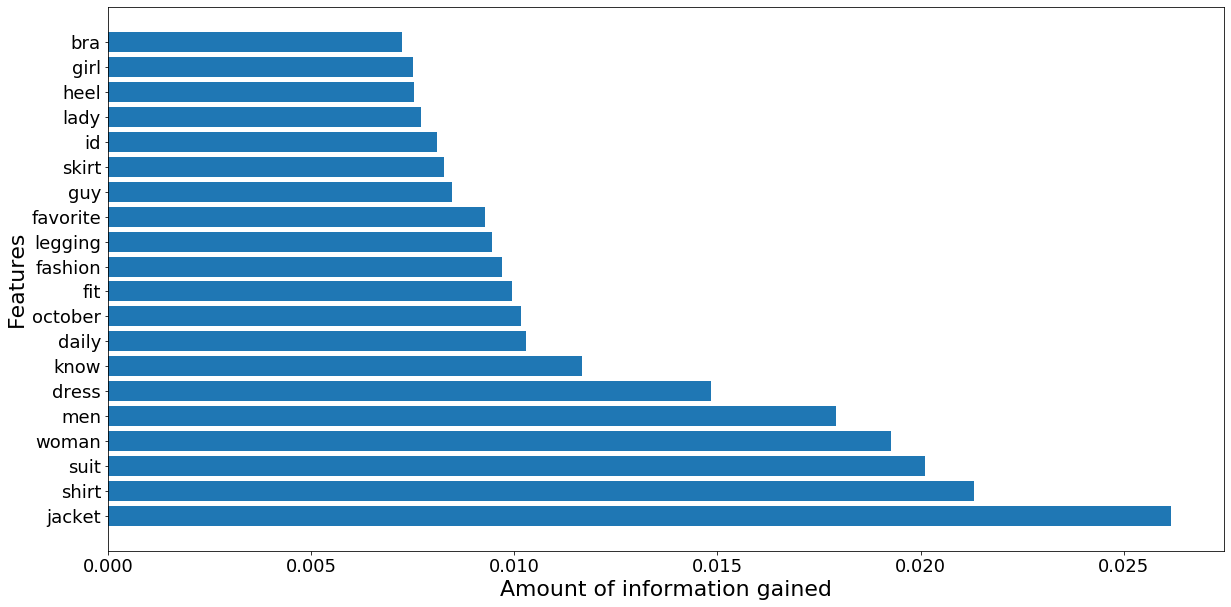

In [68]:
#from adi's lesson
plt.figure(figsize=(20,10))
temp = features_df.sort_values('Importance', ascending=False).head(20)
plt.barh(temp.index, temp['Importance'])
#plt.title('Top 20 Features from Title', fontsize=30)
plt.xlabel('Amount of information gained', fontsize=22)
plt.ylabel('Features', fontsize=22);
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

#### using a Naive Bayes and using a gridsearch w/ parameters on the training data and testing data and scoring them to see how they worked compared to the baseline model

In [59]:
X_train_dtm = cvec.fit_transform(X_train)
X_test_dtm = cvec.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.7273564630027632


In [60]:
#reminding myself of the baseline accuracy
y_test.value_counts(normalize=True)

0    0.501382
1    0.498618
Name: subreddit, dtype: float64

Our model predicted ~52% accuracy, which is an improvement over this baseline 50% accuracy
(assuming our model always predicts the mensfashion).


In [61]:
params2 = {
    'alpha': [1.0]
}

In [62]:
gs2 = GridSearchCV(nb, param_grid=params2, return_train_score=True, cv=5)
gs2.fit(X_train_df2, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={'alpha': [1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [63]:
gs2.score(X_train_df2, y_train)

0.7554297749111492

In [64]:
gs2.score(X_test_df, y_test)

0.7273564630027632